In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.misc import derivative
import seaborn as sns
import pandas as pd

In [63]:
sigma_f = lambda S,K : 0.215 + 0.374 * np.log(S / K)
sigma_new = lambda K : 0.215 + 0.374 * np.log(3200/K)
def CONP(S, K, sigma_f, r, y, t, T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    return np.exp(-r * (T - t)) * norm.cdf(-x_m)
def CONP_adj(S,K,sigma_f,r,y,t,T):
    sigma = sigma_new(K)
    dsigma_dk = derivative(sigma_new,K,dx=1e-06)
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    vega = np.sqrt(T)*K*np.exp(-r*T)*norm.pdf(x_m)
    return np.exp(-r * (T - t)) * norm.cdf(-x_m) + vega*dsigma_dk
def CONC(S, K, sigma_f, r, y, t, T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    return np.exp(-r * (T - t)) * norm.cdf(x_m)
def CONC_adj(S,K,sigma_f,r,y,t,T):
    sigma = sigma_new(K)
    dsigma_dk = derivative(sigma_new,K,dx=1e-06)
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    vega = np.sqrt(T)*K*np.exp(-r*T)*norm.pdf(x_m)
    return np.exp(-r * (T - t)) * norm.cdf(x_m) - vega*dsigma_dk

def AONP(S,K,sigma_f,r,y,t,T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)
    x_p = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) + sigma * np.sqrt(T-t) / 2
    return S * np.exp(-y * (T-t)) * norm.cdf(- x_p)    
def AONC(S,K,sigma_f,r,y,t,T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)
    x_p = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) + sigma * np.sqrt(T-t) / 2
    return S * np.exp(-y * (T-t)) * norm.cdf(x_p)  
def Vanilla_Put(S, K, sigma, r, y, t, T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)
    x_p = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) + sigma * np.sqrt(T-t) / 2
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    return K * np.exp(-r * (T-t)) * norm.cdf(- x_m) - S * np.exp(-y * (T-t)) * norm.cdf(- x_p)
def Vanilla_Call(S, K, sigma, r, y, t, T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)    
    x_p = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) + sigma * np.sqrt(T-t) / 2
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    return S * np.exp(-y * (T-t)) * norm.cdf(x_p) - K * np.exp(-r * (T-t)) * norm.cdf(x_m)
def Super_Replicate_Put(step, S, K, sigma_f, r, y, t, T):
    sigma = sigma_f(S, K)
    return ( Vanilla_Put(S, K+step, sigma, r, y, t, T) - Vanilla_Put(S, K, sigma, r, y, t, T) ) / step
def Sub_Replicate_Put(step, S, K, sigma_f, r, y, t, T):
    sigma = sigma_f(S, K)
    return ( Vanilla_Put(S, K, sigma, r, y, t, T) - Vanilla_Put(S, K-step,sigma, r, y, t, T) ) / step
def delta_CONP(S, K, sigma_f, r, y, t, T,iv=False):
    if(iv==False):
        return (CONP(S*1.01,K, sigma_f, r, y, t, T,iv=False)-CONP(S*0.99,K, sigma_f, r, y, t, T,iv=False))/0.02
    else:
        return (CONP_adj(S*1.01,K,sigma_f,r,y,t,T)-CONP_adj(S*0.99,K,sigma_f,r,y,t,T))/0.02
def delta_CONC(S, K, sigma_f, r, y, t, T,iv=False):
    if(iv==False):
        return (CONC(S*1.01,K, sigma_f, r, y, t, T,iv=False)-CONC(S*0.99,K, sigma_f, r, y, t, T,iv=False))/0.02
    else:
        return (CONC_adj(S*1.01,K,sigma_f,r,y,t,T)-CONC_adj(S*0.99,K,sigma_f,r,y,t,T))/0.02 
    

In [20]:
S=3200
K=3200
sigma=sigma_f
r = 0.0045
y = 0.018
t = 0
T = 1

In [4]:
Vanilla_Call(S, K, sigma, r, y, t, T,iv=False)

250.05936931249335

In [5]:
## Put using Vanilla Call formula
Vanilla_Call(K, S, sigma, y, r, t, T,iv=False)

292.7764172205566

In [6]:
Vanilla_Put(S, K, sigma, r, y, t, T,iv=False)

292.7764172205566

In [7]:
CONP(3200, 3200, sigma_f, 0.0045, 0.018, 0, 1)

0.5650607335695843

In [8]:
CONP_adj(3200, 3200, sigma_f, 0.0045, 0.018, 0, 1)

0.41866436924760575

In [9]:
AONP(3200, 3200, sigma_f, 0.0045, 0.018, 0, 1)

1515.4179302021132

In [11]:
CONC(3200, 3200, sigma_f, 0.0045, 0.018, 0, 1)

0.4304493762599862

In [10]:
CONC_adj(3200, 3200, sigma_f, 0.0045, 0.018, 0, 1)

0.5768457405819648

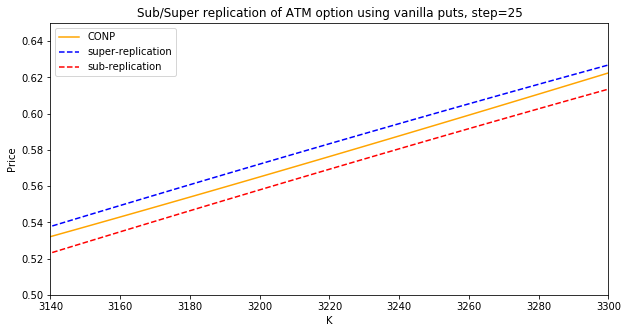

In [14]:
conp_list = []
sup_list = []
sub_list = []
K_list = np.linspace(3100, 3500, 85)
for K in K_list:
    conp_list.append(CONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
    sup_list.append(Super_Replicate_Put(25, 3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    sub_list.append(Sub_Replicate_Put(25, 3200, K, sigma_f, 0.0045, 0.018,0, 1))
plt.figure(figsize=(10,5))
plt.plot(K_list, conp_list, color='orange', label="CONP");
plt.plot(K_list, sup_list, color="blue", linestyle="dashed", label="super-replication");
plt.plot(K_list, sub_list, color='red', linestyle="dashed", label="sub-replication");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(3140, 3300)
plt.ylim(0.5, 0.65)
plt.title("Sub/Super replication of ATM option using vanilla puts, step=25")
plt.legend()

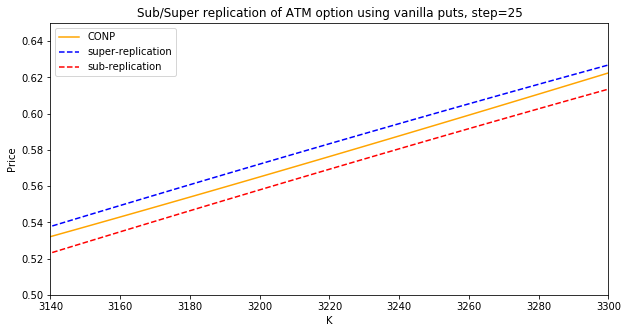

In [14]:
conp_list = []
sup_list = []
sub_list = []
K_list = np.linspace(3100, 3500, 85)
for K in K_list:
    conp_list.append(CONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
    sup_list.append(Super_Replicate_Put(25, 3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    sub_list.append(Sub_Replicate_Put(25, 3200, K, sigma_f, 0.0045, 0.018,0, 1))
plt.figure(figsize=(10,5))
plt.plot(K_list, conp_list, color='orange', label="CONP");
plt.plot(K_list, sup_list, color="blue", linestyle="dashed", label="super-replication");
plt.plot(K_list, sub_list, color='red', linestyle="dashed", label="sub-replication");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(3140, 3300)
plt.ylim(0.5, 0.65)
plt.title("Sub/Super replication of ATM option using vanilla puts, step=25")
plt.legend()

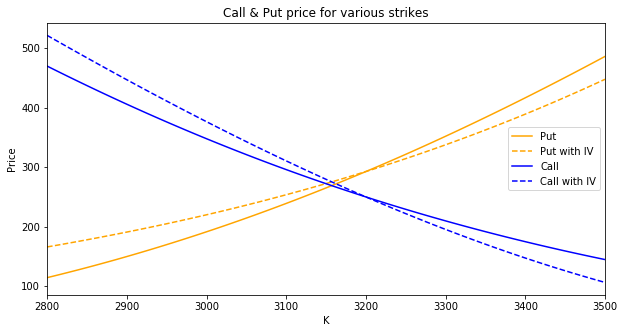

In [31]:
vanp_list = []
vanp_list_iv = [] 
vanc_list = []
vanc_list_iv = [] 
K_list = np.linspace(2800, 3500, 85)
for K in K_list:
    vanp_list.append(Vanilla_Put(3200, K, sigma_f, 0.0045, 0.018, 0, 1,False))
    vanp_list_iv.append(Vanilla_Put(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
    vanc_list.append(Vanilla_Call(3200, K, sigma_f, 0.0045, 0.018, 0, 1,False))
    vanc_list_iv.append(Vanilla_Call(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
plt.figure(figsize=(10,5))
plt.plot(K_list, vanp_list, color='orange', label="Put");
plt.plot(K_list, vanp_list_iv, color='orange', linestyle="dashed", label="Put with IV");
plt.plot(K_list, vanc_list, color="blue", label="Call");
plt.plot(K_list, vanc_list_iv, color="blue", linestyle="dashed", label="Call with IV");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(2800, 3500)
plt.title("Call & Put price for various strikes")
plt.legend()

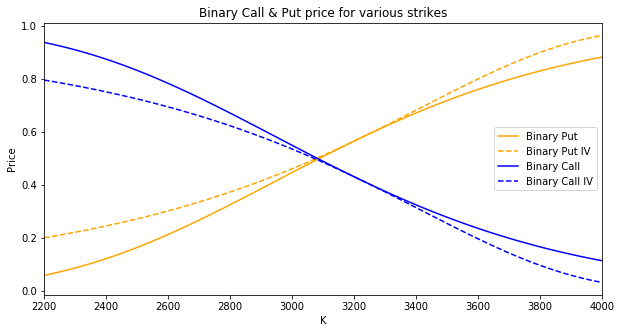

In [56]:
K_list = np.linspace(2200, 4000, 85)
conp_list = []
conp_list_iv = []
conc_list = []
conc_list_iv = []
for K in K_list:
    conp_list.append(CONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    conp_list_iv.append(CONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
    conc_list.append(CONC(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    conc_list_iv.append(CONC(3200, K, sigma_f, 0.0045, 0.018, 0, 1,True))
plt.figure(figsize=(10,5))
plt.plot(K_list, conp_list, color='orange', label="Binary Put");
plt.plot(K_list, conp_list_iv, color='orange',linestyle="dashed", label="Binary Put IV");
plt.plot(K_list, conc_list, color='blue', label="Binary Call");
plt.plot(K_list, conc_list_iv, color='blue',linestyle="dashed", label="Binary Call IV");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(2200, 4000)
plt.title("Binary Call & Put price for various strikes")
plt.legend()

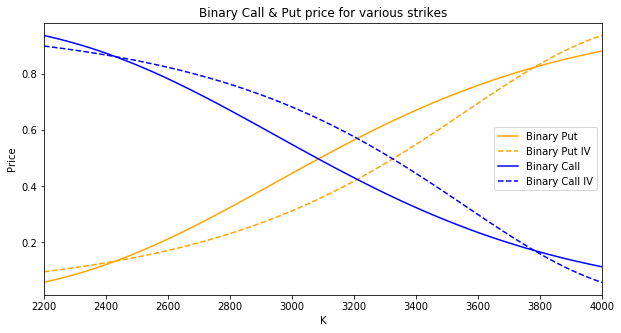

In [18]:
K_list = np.linspace(2200, 4000, 85)
conp_list = []
conp_list_iv = []
conc_list = []
conc_list_iv = []
for K in K_list:
    conp_list.append(CONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    conp_list_iv.append(CONP_adj(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    conc_list.append(CONC(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    conc_list_iv.append(CONC_adj(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
plt.figure(figsize=(10,5))
plt.plot(K_list, conp_list, color='orange', label="Binary Put");
plt.plot(K_list, conp_list_iv, color='orange',linestyle="dashed", label="Binary Put IV");
plt.plot(K_list, conc_list, color='blue', label="Binary Call");
plt.plot(K_list, conc_list_iv, color='blue',linestyle="dashed", label="Binary Call IV");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(2200, 4000)
plt.title("Binary Call & Put price for various strikes")
plt.legend()

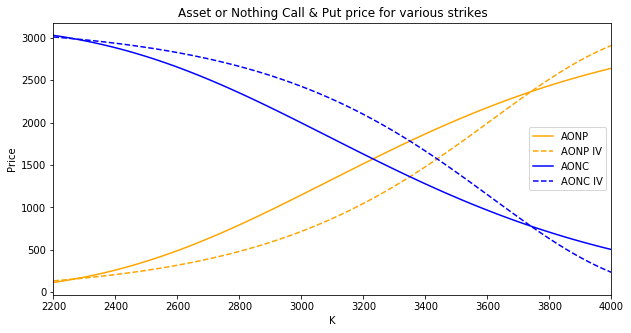

In [25]:
K_list = np.linspace(2200, 4000, 85)
aonp_list = []
aonp_list_iv = []
aonc_list = []
aonc_list_iv = []
for K in K_list:
    aonp_list.append(AONP(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    aonp_list_iv.append(K*CONP_adj(3200, K, sigma_f, 0.0045, 0.018, 0, 1) - Vanilla_Put(3200, K, sigma_f, 0.0045, 0.018, 0, 1,iv=True))
    aonc_list.append(AONC(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
    aonc_list_iv.append(Vanilla_Call(3200, K, sigma_f, 0.0045, 0.018, 0, 1,iv=True) + K*CONC_adj(3200, K, sigma_f, 0.0045, 0.018, 0, 1))
plt.figure(figsize=(10,5))
plt.plot(K_list, aonp_list, color='orange', label="AONP");
plt.plot(K_list, aonp_list_iv, color='orange',linestyle="dashed", label="AONP IV");
plt.plot(K_list, aonc_list, color='blue', label="AONC");
plt.plot(K_list, aonc_list_iv, color='blue',linestyle="dashed", label="AONC IV");
plt.xlabel("K")
plt.ylabel("Price")
plt.xlim(2200, 4000)
plt.title("Asset or Nothing Call & Put price for various strikes")
plt.legend()